# Hierarchical Clustering
Within this, we're going to use Scikit-Learn and Matplotlib to visualize how hierarchical clustering works.

In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [44]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [45]:
# Remove the several columns for the sake of this exercise
data = data.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)

# Remove rows with NaN
data.dropna(inplace=True)

# View the first five rows
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [46]:
# Only use the first 50 datapoints of the dataset for easy visualization
X = data.head(50).copy()

X


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143


In [47]:
# View the shape of the data frame. It should be (50, 17)
X.shape

(50, 17)

In [48]:
# Using the AgglomerativeClustering() function with a distance threshold of 0 and no n_clusters, fit the dataset.
aglm_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

In [49]:
# Print out the distances of that model
# I.e. n_clusters_, min(), and max()
print(f"Number of clusters: {aglm_clustering.n_clusters_}")
print(f"Minimum distance  : {aglm_clustering.distances_.min()}")
print(f"Maximum distance  : {aglm_clustering.distances_.max()}")

Number of clusters: 50
Minimum distance  : 94.14881836751856
Maximum distance  : 21721.675861129785


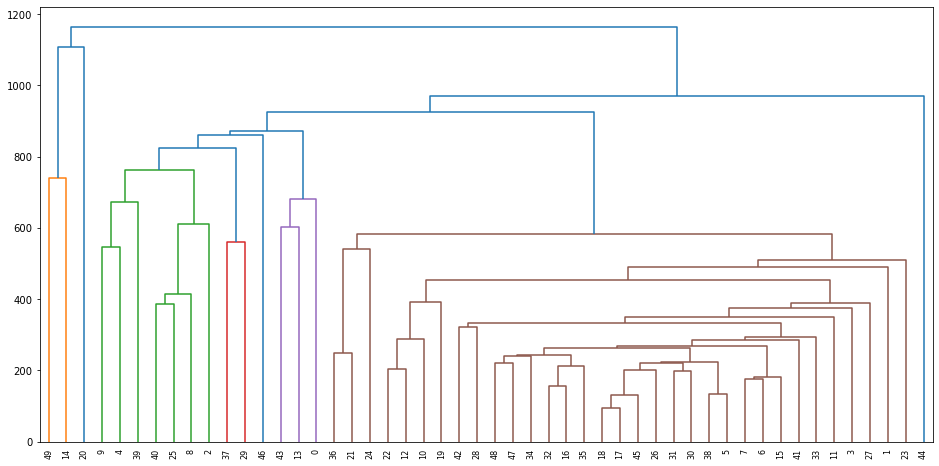

In [55]:
# Single
# Using single linkage, create and display a dendogram.
linked = linkage(X, "single")

plt.figure(figsize=(16,8))
dendrogram(linked,
           
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

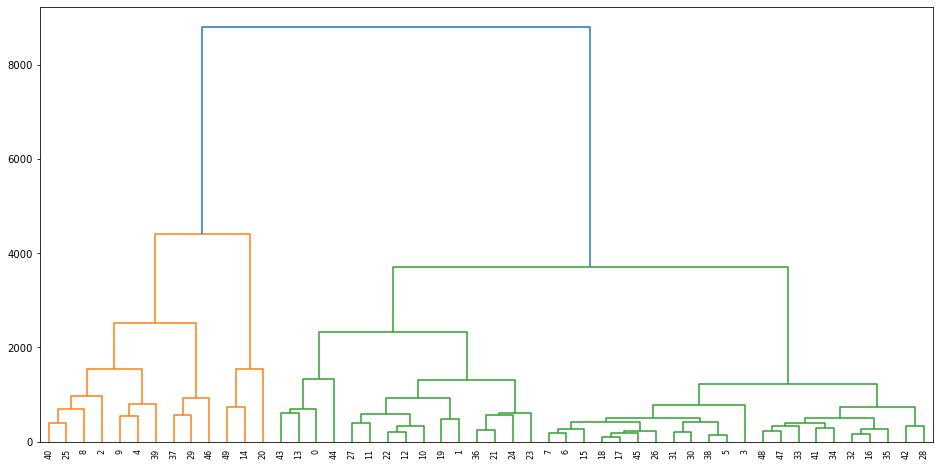

In [56]:
# Complete
# Using complete linkage, create and display a dendogram.
linked = linkage(X, "complete")

plt.figure(figsize=(16,8))
dendrogram(linked,
           
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

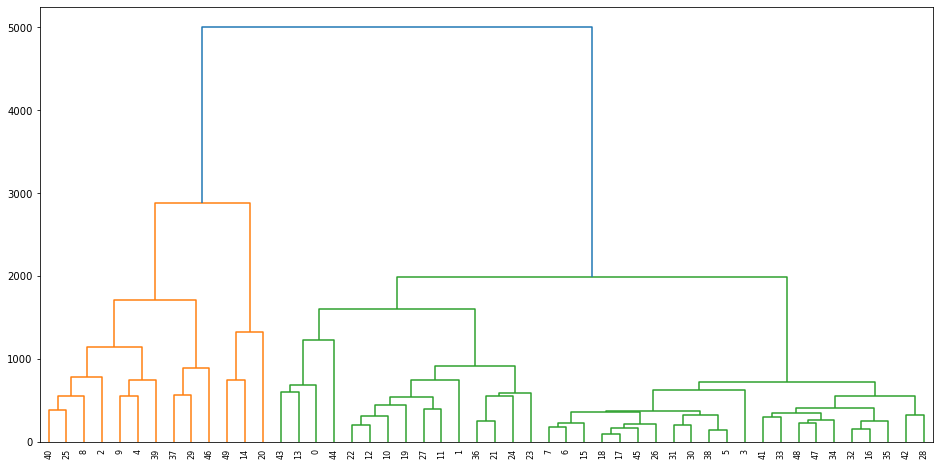

In [57]:
# Average
# Using average linkage, create and display a dendogram.
linked = linkage(X, "average")

plt.figure(figsize=(16,8))
dendrogram(linked,
           
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

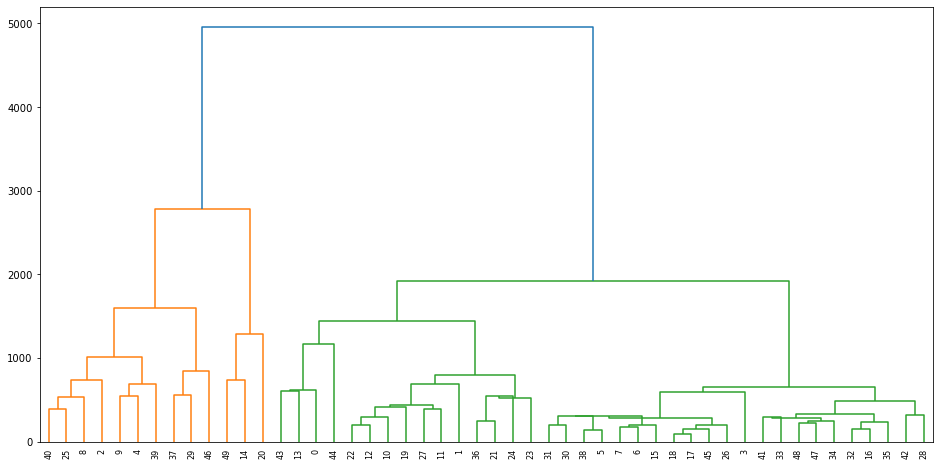

In [58]:
# Centroid
# Using centroid linkage, create and display a dendogram.
linked = linkage(X, "centroid")

plt.figure(figsize=(16,8))
dendrogram(linked,
           
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

In [60]:
# After observing the dendograms above, let's say that you want to choose "Average" linkage with only 2 clusters. 
# What are the labels of each of the datapoints?
# Print these labels out
aglm_clustering_avg = AgglomerativeClustering(n_clusters=2, linkage="average").fit(X)

print(aglm_clustering_avg.labels_)

[1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 0]
